# This is Homework 1 for Stock **PBPB (Potbelly)**

## Load Data

In [4]:
#| warning: false

install.packages("dplyr")
install.packages("ggplot2")
install.packages("lubridate")

library(dplyr)
library(ggplot2)
library(lubridate)

Installing package into ‘/home/codespace/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



Installing package into ‘/home/codespace/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/codespace/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cpp11’, ‘timechange’



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
data <- read.csv("compustat_food_bev.csv")
head(data)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,186785,1,01/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,813895,4.47,4.540,4.394,4.41,11,5812
2,186785,1,02/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,518021,4.48,4.522,4.400,4.49,11,5812
3,186785,1,03/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,947825,4.44,4.525,4.360,4.48,11,5812
4,186785,1,04/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,534286,4.41,4.490,4.280,4.48,11,5812
5,186785,1,08/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,669380,4.27,4.415,4.260,4.34,11,5812
6,186785,1,09/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,1152416,4.38,4.420,4.270,4.27,11,5812


In [6]:
data_potbelly <- filter(data, tic == 'PBPB')
head(data_potbelly)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,18839,1,01/09/2020,PBPB,POTBELLY CORP,374507,4.35,4.510,4.18,4.28,14,5812
2,18839,1,02/09/2020,PBPB,POTBELLY CORP,220405,4.41,4.500,4.27,4.32,14,5812
3,18839,1,03/09/2020,PBPB,POTBELLY CORP,288718,4.17,4.630,4.15,4.43,14,5812
4,18839,1,04/09/2020,PBPB,POTBELLY CORP,398823,4.06,4.275,3.97,4.23,14,5812
5,18839,1,08/09/2020,PBPB,POTBELLY CORP,284337,3.91,4.140,3.91,4.05,14,5812
6,18839,1,09/09/2020,PBPB,POTBELLY CORP,152405,3.95,4.053,3.83,3.92,14,5812


## Definition of columns

| Column       | Meaning                                                                                                             |
| ------------ | ------------------------------------------------------------------------------------------------------------------- |
| **GVKEY**    | Permanent unique company identifier in Compustat (stays the same even if ticker changes).                           |
| **iid**      | Issue identifier — distinguishes multiple securities for the same GVKEY (e.g., different share classes).            |
| **datadate** | Date of the observation (daily frequency here).                                                                     |
| **tic**      | Ticker symbol (e.g., PBPB = Potbelly Corp).                                                                         |
| **conm**     | Company name.                                                                                                       |
| **cshtrd**   | Daily trading volume (number of shares traded).                                                                     |
| **prccd**    | Closing price (adjusted close price per share at market close).                                                     |
| **prchd**    | High price of the day.                                                                                              |
| **prcld**    | Low price of the day.                                                                                               |
| **prcod**    | Opening price of the day.                                                                                           |
| **exchg**    | Exchange code (numeric code for which exchange the stock is traded on, e.g., 14 = NASDAQ).                          |
| **sic**      | Standard Industrial Classification code (4-digit industry classification, here 5812 = Eating Places / Restaurants). |

## To do
1. Add a column with the daily return
2. Add a column with the overnight return
3. Add a column with the close-open change
4. Add a column with the money flow volume indicator (MFV)
5. Add a column that indicates the month.
6. Add a column that indicates the year.
7. Calculate the total trading volume, in June 2023.
8. Calculate the mean daily return, over the entire period.
9. Find and display the date that saw the largest positive high price.
10. Find and display The date that saw the largest positive daily return.

Were there any corporate announcements on these dates which might explain these high numbers?

In [7]:
#1
data_potbelly <- mutate(data_potbelly, daily_ret = (prccd - lag(prccd)) / lag(prccd))

#2
data_potbelly <- mutate(data_potbelly, overnight_ret = (prcod - lag(prccd)) / lag(prccd))

#3
data_potbelly <- mutate(data_potbelly, change_open_close = prccd - prcod)

#4
data_potbelly <- mutate(data_potbelly, mfv = ((prccd - prcld) - (prchd - prccd)) * cshtrd/ (prchd - prcld))

#5 and 6
data_potbelly$datadate <- as.Date(data_potbelly$datadate, format = "%d/%m/%Y")
data_potbelly$month <- month(data_potbelly$datadate)
data_potbelly$year <- year(data_potbelly$datadate)

In [8]:
head(data_potbelly)
tail(data_potbelly)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_ret,overnight_ret,change_open_close,mfv,month,year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18839,1,2020-09-01,PBPB,POTBELLY CORP,374507,4.35,4.510,4.18,4.28,14,5812,NA,NA,0.07,11348.70,9,2020
2,18839,1,2020-09-02,PBPB,POTBELLY CORP,220405,4.41,4.500,4.27,4.32,14,5812,0.01379310,-0.006896552,0.09,47914.13,9,2020
3,18839,1,2020-09-03,PBPB,POTBELLY CORP,288718,4.17,4.630,4.15,4.43,14,5812,-0.05442177,0.004535147,-0.26,-264658.17,9,2020
4,18839,1,2020-09-04,PBPB,POTBELLY CORP,398823,4.06,4.275,3.97,4.23,14,5812,-0.02637890,0.014388489,-0.17,-163452.05,9,2020
5,18839,1,2020-09-08,PBPB,POTBELLY CORP,284337,3.91,4.140,3.91,4.05,14,5812,-0.03694581,-0.002463054,-0.14,-284337.00,9,2020
6,18839,1,2020-09-09,PBPB,POTBELLY CORP,152405,3.95,4.053,3.83,3.92,14,5812,0.01023018,0.002557545,0.03,11618.32,9,2020


,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_ret,overnight_ret,change_open_close,mfv,month,year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
756,18839,1,2023-09-01,PBPB,POTBELLY CORP,93761,7.98,8.18,7.94,8.07,14,5812,-0.001251564,0.010012516,-0.09,-62507.33,9,2023
757,18839,1,2023-09-05,PBPB,POTBELLY CORP,89036,7.95,8.04,7.78,7.94,14,5812,-0.003759398,-0.005012531,0.01,27395.69,9,2023
758,18839,1,2023-09-06,PBPB,POTBELLY CORP,96763,7.87,8.01,7.73,7.97,14,5812,-0.010062893,0.002515723,-0.10,0.00,9,2023
759,18839,1,2023-09-07,PBPB,POTBELLY CORP,97668,7.82,7.89,7.69,7.89,14,5812,-0.006353240,0.002541296,-0.07,29300.40,9,2023
760,18839,1,2023-09-08,PBPB,POTBELLY CORP,156350,7.88,7.93,7.74,7.82,14,5812,0.007672634,0.000000000,0.06,74060.53,9,2023
761,18839,1,2023-09-11,PBPB,POTBELLY CORP,111982,7.89,7.95,7.81,7.88,14,5812,0.001269036,0.000000000,0.01,15997.43,9,2023


In [9]:
#7
data_potbelly_june_2023 <- filter(data_potbelly, month == 6, year == 2023)
head(data_potbelly_june_2023)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_ret,overnight_ret,change_open_close,mfv,month,year
,<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18839,1,2023-06-01,PBPB,POTBELLY CORP,115522,7.98,8.05,7.7700,7.78,14,5812,0.02570694,0.000000000,0.20,57761.000,6,2023
2,18839,1,2023-06-02,PBPB,POTBELLY CORP,152263,8.32,8.41,8.0500,8.08,14,5812,0.04260652,0.012531328,0.24,76131.500,6,2023
3,18839,1,2023-06-05,PBPB,POTBELLY CORP,132449,8.10,8.25,7.9613,8.23,14,5812,-0.02644231,-0.010817308,-0.13,-5184.183,6,2023
4,18839,1,2023-06-06,PBPB,POTBELLY CORP,174599,8.37,8.55,8.0500,8.05,14,5812,0.03333333,-0.006172840,0.32,48887.720,6,2023
5,18839,1,2023-06-07,PBPB,POTBELLY CORP,268521,8.72,8.82,8.3700,8.43,14,5812,0.04181601,0.007168459,0.29,149178.333,6,2023
6,18839,1,2023-06-08,PBPB,POTBELLY CORP,240227,8.21,8.91,8.1600,8.75,14,5812,-0.05848624,0.003440367,-0.54,-208196.733,6,2023


In [10]:
sprintf("Total trading volume in June 2023 is: %s", sum(data_potbelly_june_2023$cshtrd))

[1] "Total trading volume in June 2023 is: 6780601"

In [11]:
#8
mean_daily_ret <- mean(filter(data_potbelly, !is.na(daily_ret))$daily_ret)
sprintf("Mean daily return is: %s", mean_daily_ret)

[1] "Mean daily return is: 0.00127986776777774"

In [12]:
#9
max_high_price_row <- filter(data_potbelly, prchd == max(data_potbelly$prchd))
max_high_price_date <- max_high_price_row$datadate
sprintf("Date when largest high price is: %s", max_high_price_date)
max_high_price_row

[1] "Date when largest high price is: 2023-04-26"

GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_ret,overnight_ret,change_open_close,mfv,month,year
<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18839,1,2023-04-26,PBPB,POTBELLY CORP,676321,10.85,11.14,9.9209,10.15,14,5812,0.06581532,-0.002946955,0.7,354554,4,2023


In [13]:
#10
max_high_return_row <- filter(data_potbelly, daily_ret == max(data_potbelly$daily_ret, na.rm = TRUE))
max_high_return_date <- max_high_return_row$datadate
sprintf("Date when largest positive daily ret is: %s", max_high_return_date)
max_high_return_row

[1] "Date when largest positive daily ret is: 2021-03-15"

GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic,daily_ret,overnight_ret,change_open_close,mfv,month,year
<int>,<int>,<date>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18839,1,2021-03-15,PBPB,POTBELLY CORP,572707,6.82,6.95,5.78,5.78,14,5812,0.1758621,-0.003448276,1.04,445438.8,3,2021


## Part 2 is here

Number 5: Visualise using scatter plot, the relationship between simple daily returns and volume in the year of 2021

Warning message:
“Removed 16 rows containing missing values or values outside the scale range
(`geom_point()`).”


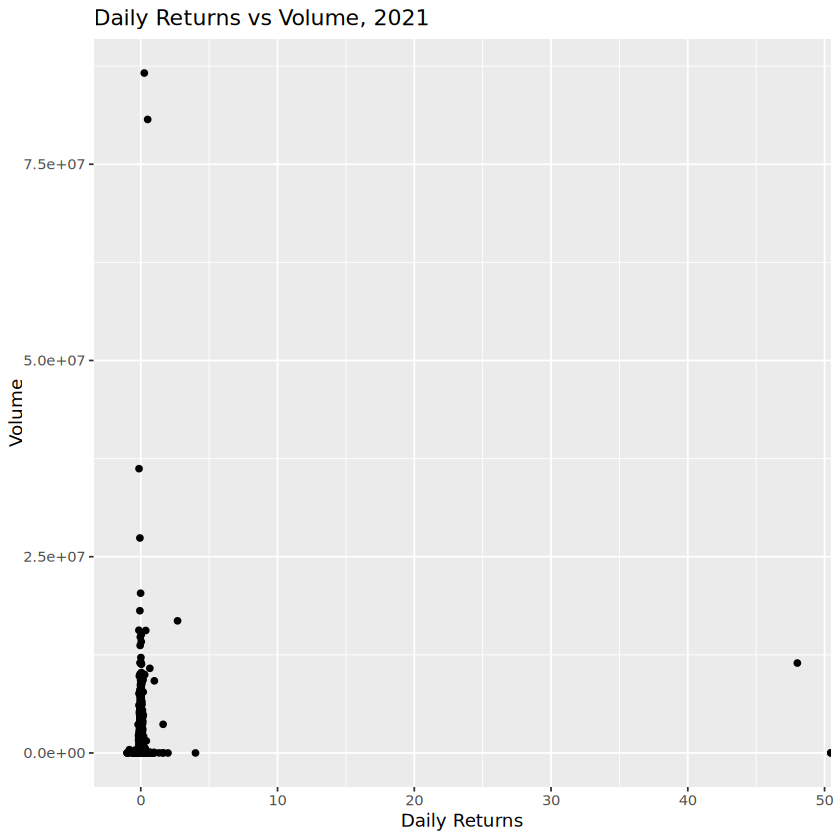

In [ ]:
#5 Visualise using scatter plot, the relationship between simple daily returns and volume in the year of 2021
data <- mutate(data, daily_ret = (prccd - lag(prccd)) / lag(prccd))
data$datadate <- as.Date(data$datadate, format = "%d/%m/%Y")
data$month <- month(data$datadate)
data$year <- year(data$datadate)

data_2021 <- filter(data, year == 2021)

ggplot(data_2021, aes(x = daily_ret, y = cshtrd)) + # this is main data
    geom_point() +                                  # this is scatter plot of above data
    labs(title = "Daily Returns vs Volume, 2021", x = "Daily Returns", y = "Volume")